# Assignment #5 - Jackie Woodlief & Jeff Sharpe

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, Imputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

/home/shelob/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Big Picture

Based on the past performance of the 2015 flight dataset (from assignment 3), we saw that the non-linear SVM's performed well on the data set; however, that was due in part because we reduced the size of our data set by quite a bit. If the Gaussian RBF with grid search can yield such good results on a small - medium size and complex data set, we can imagine that since neural networks are better at dealing with large, complex data sets, then the performance may even improve. The main reason being is that there will be more data. With such a big, complex data set, a neural network seems like the most appropriate approach.

# Get the Data / Info

We are using the flight data set because it is our largest data set, it's massive, with almost 6,000,000 rows and 31 columns. In the past we couldn't use the entire data set because it was too big for our computers to handle efficiently. In addition, we already know that this is a complex data set due to our past assignments involving it and visualizing it.



https://www.kaggle.com/usdot/flight-delays/data

Click on the above link, and download flights.csv, as that is the data set I used for this assignment!

In [2]:
 #Let's read in our data

flights_data = pd.read_csv("flights.csv")

/home/shelob/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_set_throwaway, flights = train_test_split(flights_data, test_size = 0.7, random_state = 42)
del train_set_throwaway # since we don't them, we can go ahead and delete them from the memory!

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4073356 entries, 1508570 to 4778072
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AI

In [5]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,4073356.0,4.073356e+06,4.073356e+06,4.073356e+06,4.073356e+06,4.073356e+06,4.012956e+06,4.012956e+06,4.010904e+06,4.010904e+06,...,4.073356e+06,4.008459e+06,3.999689e+06,4.073356e+06,4.073356e+06,744260.000000,744260.000000,744260.000000,744260.000000,744260.000000
mean,2015.0,6.523678e+00,1.570806e+01,3.927097e+00,2.172386e+03,1.329644e+03,1.335253e+03,9.365766e+00,1.607063e+01,1.357167e+03,...,1.493930e+03,1.476669e+03,4.403036e+00,2.606450e-03,1.547864e-02,13.503878,0.077703,18.922163,23.494222,2.906742
std,0.0,3.404973e+00,8.783464e+00,1.988534e+00,1.756639e+03,4.835186e+02,4.961869e+02,3.696209e+01,8.898447e+00,4.977987e+02,...,5.069430e+02,5.260959e+02,3.916445e+01,5.098684e-02,1.234466e-01,28.094275,2.196466,47.870165,43.106799,20.211356
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.689000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.228000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.916000e+03,8.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.670000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.665000e+03,1.000000e+00,1.000000e+00,1134.000000,573.000000,1665.000000,1331.000000,1120.000000


In [6]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1508570,2015,4,7,2,EV,4900,N759EV,FWA,DTW,1340,...,1423.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
363270,2015,1,24,6,AS,611,N413AS,LAS,SEA,1910,...,2133.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3003945,2015,7,8,3,WN,1483,N463WN,OAK,SEA,630,...,812.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2291425,2015,5,26,2,WN,193,N7745A,STL,DAL,810,...,1222.0,152.0,0,0,NaN,0.0,0.0,0.0,152.0,0.0
2973084,2015,7,6,1,UA,253,N213UA,IAH,HNL,1000,...,1316.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Let's make a copy just in case we need to refer back to the original

copy = pd.DataFrame.copy(flights)

In [8]:
copy = copy.drop("CANCELLATION_REASON", 1)
copy = copy.drop("TAIL_NUMBER", 1)
copy = copy.drop("YEAR", 1)
copy = copy.drop("DAY", 1)
copy = copy.drop("MONTH", 1)
copy = copy.drop("FLIGHT_NUMBER", 1)
copy = copy.drop("DAY_OF_WEEK", 1)
copy = copy.drop("DIVERTED", 1)
copy = copy.drop("CANCELLED", 1)
copy = copy.drop("AIR_SYSTEM_DELAY", 1)
copy = copy.drop("SECURITY_DELAY", 1)
copy = copy.drop("WHEELS_OFF", 1)
copy = copy.drop("SCHEDULED_DEPARTURE", 1)
copy = copy.drop("WEATHER_DELAY", 1)
copy = copy.drop("AIRLINE_DELAY", 1)
copy = copy.drop("WHEELS_ON", 1)
copy = copy.drop("SCHEDULED_ARRIVAL", 1)
copy = copy.drop("ARRIVAL_TIME", 1)
copy = copy.drop("DEPARTURE_TIME", 1)

In [9]:
# copy = copy.reset_index(drop = True)

In [10]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4073356 entries, 1508570 to 4778072
Data columns (total 12 columns):
AIRLINE                object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
TAXI_IN                float64
ARRIVAL_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 404.0+ MB


In [11]:
encoder = LabelEncoder() #AIRLINE, DESTINATION_AIRPORT, ORIGIN_AIRPORT

In [12]:
airline_cat = copy["AIRLINE"]
destination_cat = copy["DESTINATION_AIRPORT"]
origin_cat = copy["ORIGIN_AIRPORT"]

In [13]:
destination_cat = destination_cat.apply(str)
origin_cat = origin_cat.apply(str)

In [14]:
# destination_cat = destination_cat.fillna('Other Dest')
# origin_cat = origin_cat.fillna('Other Org')

In [15]:
airline_cat_encoded = encoder.fit_transform(airline_cat)
destination_cat_encoded = encoder.fit_transform(destination_cat)
origin_cat_encoded = encoder.fit_transform(origin_cat)

In [16]:
copy["AIRLINE"]= airline_cat_encoded
copy["DESTINATION_AIRPORT"] = destination_cat_encoded
copy["ORIGIN_AIRPORT"] = origin_cat_encoded

In [17]:
copy.head(3)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,LATE_AIRCRAFT_DELAY
1508570,4,424,399,-5.0,13.0,56.0,48.0,30.0,128,5.0,-13.0,NaN
363270,1,480,583,-12.0,14.0,155.0,155.0,131.0,867,10.0,-12.0,NaN
3003945,13,528,583,-4.0,8.0,110.0,106.0,92.0,672,6.0,-8.0,NaN


In [18]:
imputer = Imputer(strategy = "median")

In [19]:
imputer.fit(copy)
X = imputer.transform(copy)
transform_copy = pd.DataFrame(X, columns = copy.columns)
transform_copy

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,LATE_AIRCRAFT_DELAY
0,4.0,424.0,399.0,-5.0,13.0,56.0,48.0,30.0,128.0,5.0,-13.0,3.0
1,1.0,480.0,583.0,-12.0,14.0,155.0,155.0,131.0,867.0,10.0,-12.0,3.0
2,13.0,528.0,583.0,-4.0,8.0,110.0,106.0,92.0,672.0,6.0,-8.0,3.0
3,13.0,600.0,387.0,153.0,6.0,100.0,99.0,85.0,546.0,8.0,152.0,152.0
4,10.0,457.0,447.0,8.0,16.0,498.0,488.0,461.0,3904.0,11.0,-2.0,3.0
5,3.0,452.0,326.0,16.0,13.0,70.0,49.0,28.0,151.0,8.0,-5.0,3.0
6,10.0,457.0,609.0,1.0,13.0,137.0,120.0,100.0,787.0,7.0,-16.0,3.0
7,1.0,583.0,545.0,-4.0,11.0,171.0,163.0,145.0,1107.0,7.0,-12.0,3.0
8,0.0,472.0,482.0,-8.0,34.0,385.0,381.0,341.0,2475.0,6.0,-12.0,3.0
9,5.0,253.0,80.0,9.0,9.0,249.0,222.0,204.0,1607.0,9.0,-18.0,3.0


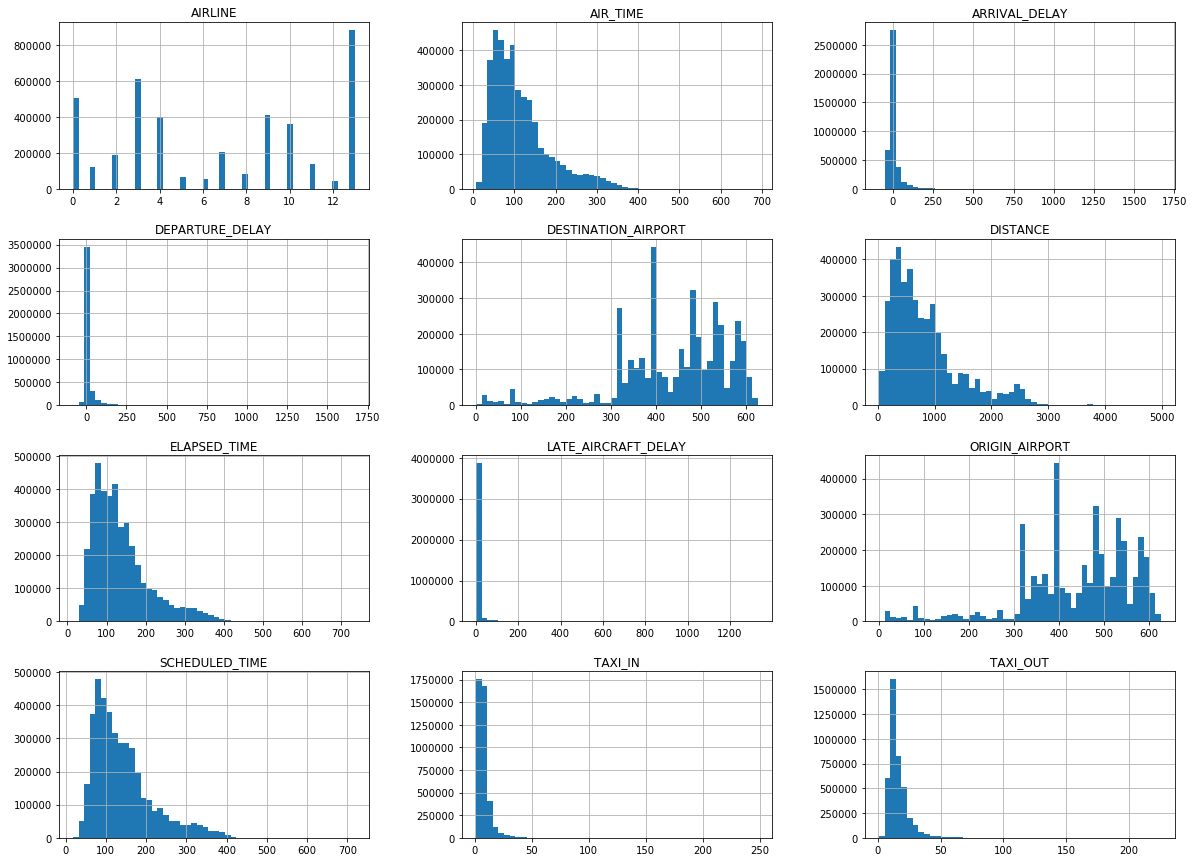

In [20]:
%matplotlib inline
transform_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

In [21]:
correlation_matrix = transform_copy.corr()

In [22]:
correlation_matrix["AIRLINE"].sort_values(ascending = False)

AIRLINE                1.000000
ORIGIN_AIRPORT         0.075676
DESTINATION_AIRPORT    0.075237
DEPARTURE_DELAY        0.028549
LATE_AIRCRAFT_DELAY    0.025727
ARRIVAL_DELAY          0.019707
TAXI_IN               -0.080107
DISTANCE              -0.083209
AIR_TIME              -0.087105
SCHEDULED_TIME        -0.106503
ELAPSED_TIME          -0.111195
TAXI_OUT              -0.170175
Name: AIRLINE, dtype: float64

In [23]:
train_set, test_set = train_test_split(transform_copy, test_size = 0.2, random_state = 42)

In [24]:
train_set.head(3)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,LATE_AIRCRAFT_DELAY
991942,13.0,449.0,390.0,-1.0,12.0,170.0,166.0,148.0,1218.0,6.0,-5.0,3.0
194630,0.0,392.0,480.0,22.0,17.0,181.0,174.0,149.0,1055.0,8.0,15.0,0.0
2116737,13.0,498.0,609.0,9.0,7.0,150.0,138.0,126.0,1048.0,5.0,-3.0,3.0


In [25]:
test_set.head(3)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,LATE_AIRCRAFT_DELAY
281148,3.0,544.0,522.0,-5.0,16.0,163.0,155.0,136.0,980.0,3.0,-13.0,3.0
2114217,3.0,582.0,326.0,-4.0,14.0,86.0,74.0,54.0,321.0,6.0,-16.0,3.0
3609968,7.0,398.0,534.0,9.0,8.0,89.0,72.0,55.0,299.0,9.0,-8.0,3.0


In [26]:
# Now we need to split up into test and train sets based on the airline (multi-class)

y_train = train_set["AIRLINE"]
y_test = test_set["AIRLINE"]
x_test = test_set.drop("AIRLINE", 1)
x_train = train_set.drop("AIRLINE", 1)

# We need to convert to float32 due to a warning we get when we do the dnn_clf
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')

In [27]:
y_train.head(2)

991942    13.0
194630     0.0
Name: AIRLINE, dtype: float32

In [28]:
x_train.head(2)

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,LATE_AIRCRAFT_DELAY
991942,449.0,390.0,-1.0,12.0,170.0,166.0,148.0,1218.0,6.0,-5.0,3.0
194630,392.0,480.0,22.0,17.0,181.0,174.0,149.0,1055.0,8.0,15.0,0.0


# Large-Scale Visualization

Below we will be visualizing different aspects of our data to demonstrate that it is in fact a complex data set!

# Construction Phase

In [29]:
# Before we do anything, in order to feed the various clf's our labels, we must first convert them from
# float to integers

y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [30]:
# x_train_ds = x_train.values
# x_test_ds = x_test.values

## Fully connected network with 2 hidden layers

This is the neural network that we start with!

In [31]:
# Since there are 14 different airlines, we need to change n_classes to 14, default seems to be 10
# NOTE: This will take a few minutes!!

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units = [300, 100], n_classes = 14, feature_columns = feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(x_train, y_train_int, batch_size = 50, steps = 40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7eff713ea128>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpm3n9cis9'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpm3n9cis9/model.ckpt.
INFO:tensorflow:loss = 103.38609, step = 1
INFO:tensorflow:global_step/sec: 86.5193
INFO:tensorflow:loss = 2.588475, step = 101 (1.161 sec)
INFO:tensorflow:global_step/sec: 88.8873
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 88.5292
INFO:tensorflow:loss = 1.7998375, step = 7301 (1.129 sec)
INFO:tensorflow:global_step/sec: 90.9653
INFO:tensorflow:loss = 1.8174495, step = 7401 (1.100 sec)
INFO:tensorflow:global_step/sec: 91.7304
INFO:tensorflow:loss = 1.9320122, step = 7501 (1.091 sec)
INFO:tensorflow:global_step/sec: 75.2524
INFO:tensorflow:loss = 1.976272, step = 7601 (1.331 sec)
INFO:tensorflow:global_step/sec: 82.3245
INFO:tensorflow:loss = 2.0202944, step = 7701 (1.213 sec)
INFO:tensorflow:global_step/sec: 87.3597
INFO:tensorflow:loss = 1.938051, step = 7801 (1.145 sec)
INFO:tensorflow:global_step/sec: 82.3508
INFO:tensorflow:loss = 1.7989607, step = 7901 (1.215 sec)
INFO:tensorflow:global_step/sec: 87.7088
INFO:tensorflow:loss = 1.9449322, step = 8001 (1.138 sec)
INFO:tensorflow:global_step/sec: 88.9697
INFO:tensorflow:loss = 1.9498981, step = 8101 (1.124 sec)
INFO:tensorflow:global_step/sec: 90.9754
INFO:tensorflow:loss = 1.8893251, step = 8201 (1.100 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 92.0653
INFO:tensorflow:loss = 1.8704114, step = 15601 (1.085 sec)
INFO:tensorflow:global_step/sec: 91.8435
INFO:tensorflow:loss = 2.067714, step = 15701 (1.088 sec)
INFO:tensorflow:global_step/sec: 92.2933
INFO:tensorflow:loss = 1.74111, step = 15801 (1.086 sec)
INFO:tensorflow:global_step/sec: 91.6043
INFO:tensorflow:loss = 1.9801062, step = 15901 (1.090 sec)
INFO:tensorflow:global_step/sec: 91.3689
INFO:tensorflow:loss = 1.7501281, step = 16001 (1.096 sec)
INFO:tensorflow:global_step/sec: 89.3323
INFO:tensorflow:loss = 1.9200689, step = 16101 (1.118 sec)
INFO:tensorflow:global_step/sec: 92.159
INFO:tensorflow:loss = 1.7839866, step = 16201 (1.087 sec)
INFO:tensorflow:global_step/sec: 86.8203
INFO:tensorflow:loss = 1.6920521, step = 16301 (1.151 sec)
INFO:tensorflow:global_step/sec: 88.8504
INFO:tensorflow:loss = 1.9802052, step = 16401 (1.126 sec)
INFO:tensorflow:global_step/sec: 89.6926
INFO:tensorflow:loss = 1.9056505, step = 16501 (1.113 sec)
INFO

INFO:tensorflow:loss = 1.9528089, step = 23801 (1.092 sec)
INFO:tensorflow:global_step/sec: 91.8273
INFO:tensorflow:loss = 1.7423457, step = 23901 (1.088 sec)
INFO:tensorflow:global_step/sec: 90.6999
INFO:tensorflow:loss = 1.4992039, step = 24001 (1.103 sec)
INFO:tensorflow:global_step/sec: 89.4365
INFO:tensorflow:loss = 2.0209541, step = 24101 (1.116 sec)
INFO:tensorflow:global_step/sec: 92.2766
INFO:tensorflow:loss = 1.6791017, step = 24201 (1.086 sec)
INFO:tensorflow:global_step/sec: 91.8204
INFO:tensorflow:loss = 1.922694, step = 24301 (1.088 sec)
INFO:tensorflow:global_step/sec: 86.8024
INFO:tensorflow:loss = 1.8415989, step = 24401 (1.151 sec)
INFO:tensorflow:global_step/sec: 87.209
INFO:tensorflow:loss = 1.7390115, step = 24501 (1.148 sec)
INFO:tensorflow:global_step/sec: 88.4388
INFO:tensorflow:loss = 1.7943416, step = 24601 (1.131 sec)
INFO:tensorflow:global_step/sec: 57.1843
INFO:tensorflow:loss = 2.0164273, step = 24701 (1.749 sec)
INFO:tensorflow:global_step/sec: 92.1279
IN

INFO:tensorflow:global_step/sec: 89.9353
INFO:tensorflow:loss = 1.957067, step = 32101 (1.113 sec)
INFO:tensorflow:global_step/sec: 88.8011
INFO:tensorflow:loss = 1.9206784, step = 32201 (1.123 sec)
INFO:tensorflow:global_step/sec: 88.7138
INFO:tensorflow:loss = 2.077197, step = 32301 (1.129 sec)
INFO:tensorflow:global_step/sec: 90.8577
INFO:tensorflow:loss = 2.0137177, step = 32401 (1.099 sec)
INFO:tensorflow:global_step/sec: 91.4032
INFO:tensorflow:loss = 1.6952872, step = 32501 (1.096 sec)
INFO:tensorflow:global_step/sec: 88.1464
INFO:tensorflow:loss = 1.8934662, step = 32601 (1.134 sec)
INFO:tensorflow:global_step/sec: 90.4887
INFO:tensorflow:loss = 1.670536, step = 32701 (1.106 sec)
INFO:tensorflow:global_step/sec: 92.0287
INFO:tensorflow:loss = 1.7151593, step = 32801 (1.087 sec)
INFO:tensorflow:global_step/sec: 91.7595
INFO:tensorflow:loss = 1.7280213, step = 32901 (1.089 sec)
INFO:tensorflow:global_step/sec: 89.3486
INFO:tensorflow:loss = 1.6161554, step = 33001 (1.118 sec)
INF

SKCompat()

In [32]:
# With a smaller data set of about 100,000 entries, accuracy is about 41%
# it goes down when more entries are added it seems

y_predict = dnn_clf.predict(x_test)
accuracy_score(y_test_int, y_predict['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpm3n9cis9/model.ckpt-40000


0.38958623838796475

In [33]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814672 entries, 281148 to 1381503
Data columns (total 11 columns):
ORIGIN_AIRPORT         814672 non-null float32
DESTINATION_AIRPORT    814672 non-null float32
DEPARTURE_DELAY        814672 non-null float32
TAXI_OUT               814672 non-null float32
SCHEDULED_TIME         814672 non-null float32
ELAPSED_TIME           814672 non-null float32
AIR_TIME               814672 non-null float32
DISTANCE               814672 non-null float32
TAXI_IN                814672 non-null float32
ARRIVAL_DELAY          814672 non-null float32
LATE_AIRCRAFT_DELAY    814672 non-null float32
dtypes: float32(11)
memory usage: 80.4 MB


# Execution Phase of DNN

In [34]:
len(y_train) # This is the amount of times we will need to iterate through later

3258684

In [35]:
len(train_set)

3258684

In [36]:
n_epochs = 40
batch_size = 50
init=tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(train_set) // batch_size):
            x_batch = x_train.next_batch(batch_size)
            y_batch = y_train_int.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: x_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict = {X: x_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict = {X: x_test, y: y_test_int})
        print(epoch, "Train Accuracy:", acc_train, "Test Accuracy:", acc_test)
    
    save_path = saver.save(sess, "./my_model_final.ckpt")

AttributeError: 'DataFrame' object has no attribute 'next_batch'